In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 There exists a Mean Squared Error Loss function |x - x̂|². We want you to
experiment with different types of loss functions. Consider the following loss
functions: 
- c. |x - x̂|⁴
- d. |x - x̂|⁷

In [2]:
power = 7

In [3]:
f=pd.read_csv('polyRegr.csv')

Taking polynomial to be Quadratic

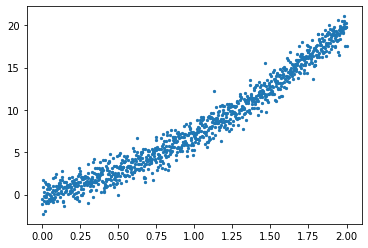

In [4]:
np.random.seed(1)
a = np.random.randint(0, 5)
b = np.random.randint(0, 5)
c = np.random.randint(0, 5)
X = np.array([i/50 for i in np.linspace(0,100,1000)])
Y = [(a*x**2 + b*x + c) + np.random.normal(0,1) for x in X]
plt.scatter(X, Y,s=5)
plt.show()

In [5]:
def calculate_error(y_hat, y):
    """
   loss function:
   |x - x̂|^7
     error between target, y, and prediction y_hat.
    """
    error = 0.5 * (y - y_hat) ** power
    return abs(error)
def calc_mean_error(y_hats, Y):
    error = np.mean([calculate_error(y_hat, y) for y_hat, y in zip(y_hats, Y)])
    return error

In [6]:
 #  3 parameters
para=[0,0,0]
# Intializing points for better training
para = [2,2,2]

In [7]:
def predicts(a,b,c ,X):
        #print([m * x + c for x in X])
        return [a*x**2 + b*x + c for x in X]
y_hats = predicts(para[0],para[1],para[2],X)


In [8]:
def gradient_step(para, X, Y, eta=0.0000005):
    """
    loss function:
   |x - x̂|^7
     error between target, y, and prediction y_hat.
    """
    
    N = len(X)
    my_list = [0, 0,0]
    numpy_array = np.array(my_list, dtype=np.float64) 
    for x, y in zip(X, Y):
        #grad_m += - (1/N) * x * (y - (para[0] * x + para[1])) 
        #grad_b += - (1/N) * (y - (para[0] * x + para[1]))
        numpy_array[0] += - (1/N) * (y - (para[0] * x**2 + para[1] * x + para[2]))**(power-1) * x**2
        numpy_array[1] += - (1/N) * (y - (para[0] * x**2 + para[1] * x + para[2]))**(power-1) * x
        numpy_array[2] += - (1/N) * (y - (para[0] * x**2 + para[1] * x + para[2]))**(power-1)
    new_m = para[0] - (eta * numpy_array[0])
    new_b = para[1] - (eta * numpy_array[1])
    new_c = para[2] - (eta * numpy_array[2])
    
    return new_m, new_b , new_c

In [9]:
para[0], para[1] , para[2] = gradient_step(para, X, Y)

In [10]:
y_hats = predicts(para[0], para[1],para[2], X)


In [11]:
errors = []
# Iterating Gradient step 
for _ in range(1000):
    para[0], para[1],para[2] = gradient_step(para, X, Y)
    y_hats = predicts(para[0], para[1],para[2], X)
    error = calc_mean_error(y_hats, Y)
    errors.append(error)

In [12]:
y_hats = predicts(para[0], para[1],para[2], X)

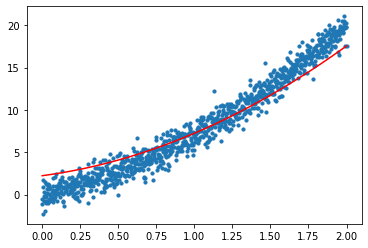

In [13]:
plt.scatter(X, Y,s=10)
plt.plot(X, y_hats, c='r')
plt.show()

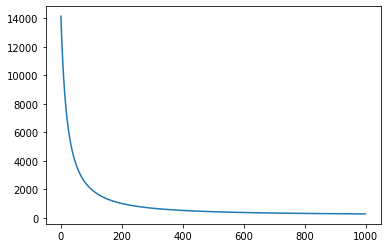

In [14]:

plt.plot(errors)

plt.show()